**Table of Contents**
* Introduction
* Load & Prepare Data
* Exploratory Data Analysis
* Statistical Significance Testing
* Feature Engineering & Selection
* Model Building & Inferences
* Summary
* Business Recommendations

**Introduction**
This is an exploratory data analysis of an automotive insurance dataset to understand the factors by which an automobile company captures the Customer Lifetime Value - a critical KPI that drives its marketing and customer retention / acquisition strategies. This analysis is using the CRISP-DM process. The key steps being undertaken are:
* Business Understanding
* Data Understanding
* Prepare Data
* Data Modeling
* Result Evaluation
* Deploy

**Business Understanding**
My current role is in taking Data-driven solutions to a major automotive customer as part of the IT Services company I work for. Although I am not a core Automotive SME, I have been in this industry for quite sometime. As a customer and a consumer myself, I understand the broad tenets of the automobile business; but I was keen to explore the auto finance world as that drives the overall sales & marketing strategy, beyond the obvious design and other technical features of a vehicle. Aftersales and customer engagement then become the true measure of how an automobile company is able to retain its current customers, cross-sell/up-sell other products while also acquiring new customers based on this response. I hope that with this EDA, I am able to bring more insights into my current work and also understand what solutions I can take to the market to my customer. 

Some of the key questions I am looking to answer with this EDA and statistical modeling are:
* Q1. What are those factors (Numerical) that most influence the Customer Lifetime Value (positive / negative impact)?
* Q2. What is the demographic profile (key features) of the observed customers?
* Q3. Which are the key features that will be most useful in predicting CLV?
* Q4. What are the key business recommendations we can make by observing and analyzing this dataset?

In [364]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")

**A) LOAD & PREPARE THE DATA**

In [365]:
df = pd.read_csv('/Users/rishimadhav/Desktop/Udacity Data Scientist ND/Project 1/squark_automotive_CLV_training_data.csv')
df

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129      NaN         NaN                      NaN      NaN       NaN   
9130      NaN         NaN                      NaN      NaN       NaN   
9131      NaN         NaN                      NaN      NaN       NaN   
9132      NaN         NaN                      NaN      NaN       NaN   
9133      NaN         NaN                      NaN      NaN       NaN   

     Education Effective To Date EmploymentStatus Gender   Income  ...  \
0     Bachelor         2/24/2011         Employed      F  56274.0  ...   
1     Bachelor         1/31/2011       Unemployed      F      0.0  ...   
2     Bachelor         2/19/2011         Employed      F  48767.0  ...   
3     Bachelor         1/20/2011       Unemployed      M      0.0  ...   
4     Bachelor          2/3/2011         Employed      M  43836.0  ...   
...        ...               ...              ...    ...      ...  ...   
9129       NaN               NaN              NaN    NaN      NaN  ...   
9130       NaN               NaN              NaN    NaN      NaN  ...   
9131       NaN               NaN              NaN    NaN      NaN  ...   
9132       NaN               NaN              NaN    NaN      NaN  ...   
9133       NaN               NaN              NaN    NaN      NaN  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                              5.0                       0.0   
1                             42.0                       0.0   
2                             38.0                       0.0   
3                             65.0                       0.0   
4                             44.0                       0.0   
...                            ...                       ...   
9129                           NaN                       NaN   
9130                           NaN                       NaN   
9131                           NaN                       NaN   
9132                           NaN                       NaN   
9133                           NaN                       NaN   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                    1.0  Corporate Auto  Corporate L3            Offer1   
1                    8.0   Personal Auto   Personal L3            Offer3   
2                    2.0   Personal Auto   Personal L3            Offer1   
3                    7.0  Corporate Auto  Corporate L2            Offer1   
4                    1.0   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                 NaN             NaN           NaN               NaN   
9130                 NaN             NaN           NaN               NaN   
9131                 NaN             NaN           NaN               NaN   
9132                 NaN             NaN           NaN               NaN   
9133                 NaN             NaN           NaN               NaN   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            NaN                NaN            NaN          NaN  
9130 

In [366]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

**Observing the data**
From the above, it is clear that there are 9134 observations (rows) and 24 variables in the dataset.

Looking at the columns, we can categorize them into numerical and categorical features.

**Numerical**
* Customer Lifetime Value (target variable)
* Income
* Monthly Premium Auto
* Months Since Last Claim
* Months Since Policy Inception
* Number of Open Complaints
* Number of Policies 
* Total Claim Amount

**Categorical**
* Customer - this column is a serial number and will not be relevant for our analysis. We will remove this from our dataset.
* State
* Response
* Coverage
* Education
* Location Code
* Marital Status
* Employment Status
* Gender
* Policy Type
* Policy
* Renew Offer Type
* Sales Channel
* Vehicle Class
* Vehicle Size

**Other**
* Effective to Date (this is a date variable)

**Pandas Profiling**

Came across this pretty cool library which reduces the work of visualization & summarization of basic stats into a single line of code. I plan to use this to see what basic summary analysis this might throw.

In [367]:
from pandas_profiling import ProfileReport
DataProfile = ProfileReport(df, title = "Customer Data Profile Report", explorative=True, minimal=True)
DataProfile.to_file(output_file="DataProfile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 808.46it/s]


**Check & Treat NULL Values**

In [368]:
df.isnull().sum()

Customer                         1035
State                            1035
Customer Lifetime Value          1035
Response                         1035
Coverage                         1035
Education                        1035
Effective To Date                1035
EmploymentStatus                 1035
Gender                           1035
Income                           1035
Location Code                    1035
Marital Status                   1035
Monthly Premium Auto             1035
Months Since Last Claim          1035
Months Since Policy Inception    1035
Number of Open Complaints        1035
Number of Policies               1035
Policy Type                      1035
Policy                           1035
Renew Offer Type                 1035
Sales Channel                    1035
Total Claim Amount               1035
Vehicle Class                    1035
Vehicle Size                     1035
dtype: int64

All the columns have have NaN values. We will drop those.

In [369]:
# Drop rows if any missing values; "any" method drops the row or column if there are any null values
df.dropna(axis=0, how='any', inplace=True)
df.shape
df

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
8094  UH22701      Oregon              9726.551005       No  Extended   
8095  IA85970  California              8099.466122       No     Basic   
8096  TC18240      Oregon              5020.473987       No     Basic   
8097  GE58317     Arizona              4834.710493      Yes     Basic   
8098  GW42895      Oregon             17625.537630       No     Basic   

     Education Effective To Date EmploymentStatus Gender   Income  ...  \
0     Bachelor         2/24/2011         Employed      F  56274.0  ...   
1     Bachelor         1/31/2011       Unemployed      F      0.0  ...   
2     Bachelor         2/19/2011         Employed      F  48767.0  ...   
3     Bachelor         1/20/2011       Unemployed      M      0.0  ...   
4     Bachelor          2/3/2011         Employed      M  43836.0  ...   
...        ...               ...              ...    ...      ...  ...   
8094    Master          1/1/2011         Employed      F  72236.0  ...   
8095  Bachelor          2/7/2011       Unemployed      F      0.0  ...   
8096   College         1/29/2011         Employed      M  67890.0  ...   
8097   College         1/31/2011         Employed      F  38713.0  ...   
8098  Bachelor         1/25/2011         Employed      F  77803.0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                              5.0                       0.0   
1                             42.0                       0.0   
2                             38.0                       0.0   
3                             65.0                       0.0   
4                             44.0                       0.0   
...                            ...                       ...   
8094                          29.0                       0.0   
8095                          42.0                       0.0   
8096                          26.0                       0.0   
8097                          69.0                       4.0   
8098                          18.0                       0.0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                    1.0  Corporate Auto  Corporate L3            Offer1   
1                    8.0   Personal Auto   Personal L3            Offer3   
2                    2.0   Personal Auto   Personal L3            Offer1   
3                    7.0  Corporate Auto  Corporate L2            Offer1   
4                    1.0   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
8094                 2.0   Personal Auto   Personal L3            Offer2   
8095                 6.0   Personal Auto   Personal L3            Offer1   
8096                 3.0   Personal Auto   Personal L3            Offer1   
8097                 6.0   Personal Auto   Personal L3            Offer2   
8098                 2.0   Personal Auto   Personal L3            Offer2   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
8094    Call Center         518.064733  Four-Door Car      Medsize  
8095 

We have dropped all the rows with NaN values.

In [370]:
# We will rename the Response column to Marketing Feedback and Customer Lifetime Value to CLV to make it easier to understand
df = df.rename(columns={"Response" : "Marketing Feedback", "Customer Lifetime Value" : "CLV"})
df

Customer       State           CLV Marketing Feedback  Coverage  \
0     BU79786  Washington   2763.519279                 No     Basic   
1     QZ44356     Arizona   6979.535903                 No  Extended   
2     AI49188      Nevada  12887.431650                 No   Premium   
3     WW63253  California   7645.861827                 No     Basic   
4     HB64268  Washington   2813.692575                 No     Basic   
...       ...         ...           ...                ...       ...   
8094  UH22701      Oregon   9726.551005                 No  Extended   
8095  IA85970  California   8099.466122                 No     Basic   
8096  TC18240      Oregon   5020.473987                 No     Basic   
8097  GE58317     Arizona   4834.710493                Yes     Basic   
8098  GW42895      Oregon  17625.537630                 No     Basic   

     Education Effective To Date EmploymentStatus Gender   Income  ...  \
0     Bachelor         2/24/2011         Employed      F  56274.0  ...   
1     Bachelor         1/31/2011       Unemployed      F      0.0  ...   
2     Bachelor         2/19/2011         Employed      F  48767.0  ...   
3     Bachelor         1/20/2011       Unemployed      M      0.0  ...   
4     Bachelor          2/3/2011         Employed      M  43836.0  ...   
...        ...               ...              ...    ...      ...  ...   
8094    Master          1/1/2011         Employed      F  72236.0  ...   
8095  Bachelor          2/7/2011       Unemployed      F      0.0  ...   
8096   College         1/29/2011         Employed      M  67890.0  ...   
8097   College         1/31/2011         Employed      F  38713.0  ...   
8098  Bachelor         1/25/2011         Employed      F  77803.0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                              5.0                       0.0   
1                             42.0                       0.0   
2                             38.0                       0.0   
3                             65.0                       0.0   
4                             44.0                       0.0   
...                            ...                       ...   
8094                          29.0                       0.0   
8095                          42.0                       0.0   
8096                          26.0                       0.0   
8097                          69.0                       4.0   
8098                          18.0                       0.0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                    1.0  Corporate Auto  Corporate L3            Offer1   
1                    8.0   Personal Auto   Personal L3            Offer3   
2                    2.0   Personal Auto   Personal L3            Offer1   
3                    7.0  Corporate Auto  Corporate L2            Offer1   
4                    1.0   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
8094                 2.0   Personal Auto   Personal L3            Offer2   
8095                 6.0   Personal Auto   Personal L3            Offer1   
8096                 3.0   Personal Auto   Personal L3            Offer1   
8097                 6.0   Personal Auto   Personal L3            Offer2   
8098                 2.0   Personal Auto   Personal L3            Offer2   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
8094    Call Center         518.064733  Four-Door Car      Medsize  
8095         Bran

**Quick exploratory data analysis again with Pandas Profiling on the modified dataset**

In [371]:
DataProfile = ProfileReport(df, title = "Customer Data Profile Report", explorative=True)
DataProfile.to_file(output_file="DataProfile_updated.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1333.22it/s]


**High Level observations from the Data Profile report**

* 0% missing cells between the previous and this Data Profile report. So, it's assuring to know that the dropna worked!
* Alerts in terms of missing values have reduced and it provides quick pointers to columns which have High Cardinality / Unique Values / Distribution. For e.g., Policy is mentioned as Highly Correlated to Policy Type. We should probably drop one of these columns.
* The other charts provide for some really nice static analysis and provides for a great summary of all the variables. We will, however, build the exploratory and inferential statistics charts to dig deeper.

**Numerical Variable Columns**

In [372]:
df_numerical = df.select_dtypes(include=["int64", "float64"])
df_numerical

CLV   Income  Monthly Premium Auto  Months Since Last Claim  \
0      2763.519279  56274.0                  69.0                     32.0   
1      6979.535903      0.0                  94.0                     13.0   
2     12887.431650  48767.0                 108.0                     18.0   
3      7645.861827      0.0                 106.0                     18.0   
4      2813.692575  43836.0                  73.0                     12.0   
...            ...      ...                   ...                      ...   
8094   9726.551005  72236.0                  80.0                      2.0   
8095   8099.466122      0.0                 112.0                     19.0   
8096   5020.473987  67890.0                  63.0                     23.0   
8097   4834.710493  38713.0                  66.0                     31.0   
8098  17625.537630  77803.0                  63.0                     30.0   

      Months Since Policy Inception  Number of Open Complaints  \
0                               5.0                        0.0   
1                              42.0                        0.0   
2                              38.0                        0.0   
3                              65.0                        0.0   
4                              44.0                        0.0   
...                             ...                        ...   
8094                           29.0                        0.0   
8095                           42.0                        0.0   
8096                           26.0                        0.0   
8097                           69.0                        4.0   
8098                           18.0                        0.0   

      Number of Policies  Total Claim Amount  
0                    1.0          384.811147  
1                    8.0         1131.464935  
2                    2.0          566.472247  
3                    7.0          529.881344  
4                    1.0          138.130879  
...                  ...                 ...  
8094                 2.0          518.064733  
8095                 6.0          438.812143  
8096                 3.0          174.088540  
8097                 6.0          316.800000  
8098                 2.0          217.554695  

[8099 rows x 8 columns]

**Categorical Variable Columns**

In [373]:
df_categorical = df.select_dtypes(include="object")

# We will drop Customer, Effective to Date & Policy columns as they either do not have any effect on the analysis or are highly correlated (Policy vs Policy Type - we will keep only 1)
df_categorical.drop("Customer", axis=1, inplace=True)
df_categorical.drop("Effective To Date", axis=1, inplace=True)
df_categorical.drop('Policy', axis=1, inplace=True) #Either Policy of Policy Type can be kept. Keeping both columns seems redundant.

df_categorical

State Marketing Feedback  Coverage Education EmploymentStatus  \
0     Washington                 No     Basic  Bachelor         Employed   
1        Arizona                 No  Extended  Bachelor       Unemployed   
2         Nevada                 No   Premium  Bachelor         Employed   
3     California                 No     Basic  Bachelor       Unemployed   
4     Washington                 No     Basic  Bachelor         Employed   
...          ...                ...       ...       ...              ...   
8094      Oregon                 No  Extended    Master         Employed   
8095  California                 No     Basic  Bachelor       Unemployed   
8096      Oregon                 No     Basic   College         Employed   
8097     Arizona                Yes     Basic   College         Employed   
8098      Oregon                 No     Basic  Bachelor         Employed   

     Gender Location Code Marital Status     Policy Type Renew Offer Type  \
0         F      Suburban        Married  Corporate Auto           Offer1   
1         F      Suburban         Single   Personal Auto           Offer3   
2         F      Suburban        Married   Personal Auto           Offer1   
3         M      Suburban        Married  Corporate Auto           Offer1   
4         M         Rural         Single   Personal Auto           Offer1   
...     ...           ...            ...             ...              ...   
8094      F      Suburban        Married   Personal Auto           Offer2   
8095      F         Urban       Divorced   Personal Auto           Offer1   
8096      M         Urban        Married   Personal Auto           Offer1   
8097      F      Suburban       Divorced   Personal Auto           Offer2   
8098      F         Urban        Married   Personal Auto           Offer2   

     Sales Channel  Vehicle Class Vehicle Size  
0            Agent   Two-Door Car      Medsize  
1            Agent  Four-Door Car      Medsize  
2            Agent   Two-Door Car      Medsize  
3      Call Center            SUV      Medsize  
4            Agent  Four-Door Car      Medsize  
...            ...            ...          ...  
8094   Call Center  Four-Door Car      Medsize  
8095        Branch            SUV      Medsize  
8096         Agent  Four-Door Car      Medsize  
8097   Call Center  Four-Door Car      Medsize  
8098         Agent  Four-Door Car      Medsize  

[8099 rows x 13 columns]

**Statistical Summary**

In [374]:
df_numerical.describe()

CLV        Income  Monthly Premium Auto  \
count   8099.000000   8099.000000           8099.000000   
mean    7981.271398  37843.544265             93.140758   
std     6847.287340  30370.556860             34.381153   
min     1898.007675      0.000000             61.000000   
25%     3974.498315      0.000000             68.000000   
50%     5780.182197  34430.000000             83.000000   
75%     8963.294993  62459.500000            109.000000   
max    83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              8099.000000                    8099.000000   
mean                 15.071490                      48.147549   
std                  10.086656                      27.818744   
min                   0.000000                       0.000000   
25%                   6.000000                      25.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                8099.000000         8099.000000         8099.000000  
mean                    0.389184            2.963823          431.464401  
std                     0.914152            2.390357          286.706233  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          269.484578  
50%                     0.000000            2.000000          383.167471  
75%                     0.000000            4.000000          547.200000  
max                     5.000000            9.000000         2893.239678

In [375]:
df_categorical.describe()

State Marketing Feedback Coverage Education EmploymentStatus Gender  \
count     8099               8099     8099      8099             8099   8099   
unique       5                  2        3         5                5      2   
top     Oregon                 No    Basic  Bachelor         Employed      F   
freq      2475               6926     4931      2430             5079   4164   

       Location Code Marital Status    Policy Type Renew Offer Type  \
count           8099           8099           8099             8099   
unique             3              3              3                4   
top         Suburban        Married  Personal Auto           Offer1   
freq            5098           4728           6053             3324   

       Sales Channel  Vehicle Class Vehicle Size  
count           8099           8099         8099  
unique             4              6            3  
top            Agent  Four-Door Car      Medsize  
freq            3087           4110         5671

**B) EXPLORATORY DATA ANALYSIS**

<AxesSubplot:>

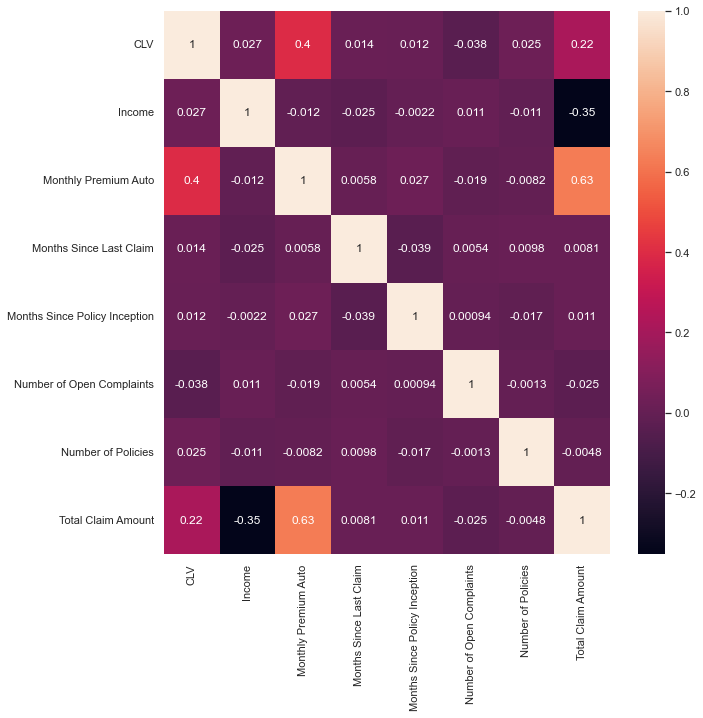

In [376]:
# A quick heatmap plot of the numerical features should give us an initial sense of how the features impact CLV
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), color='b', annot=True)

**Observations**

Features that are highly correlated are shown in lighter colours and those that are negatively correlated are shown in dark shades. 
From this heatmap, following are the high level observations - the top 3 numerical features that strongly influence (+ / -) Customer Lifetime Value are:
* Monthly Premium Auto
* Total Claim Amount
* Number of Open Complaints (-ve); Lesser the number of complaints, higher the Customer Lifetime Value.
* Income - have included this as well but this feature does not seem to have as much impact as the others above. We will analyze further!

**Exploratory Data Analysis: Visualize & Analyze - Numerical Features**

In [377]:
df_numerical.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

**Target Variable Analysis - Customer Lifetime Value**

8963.2949935
12376.38555
15335.236667999994
21924.99620699999
83325.38119


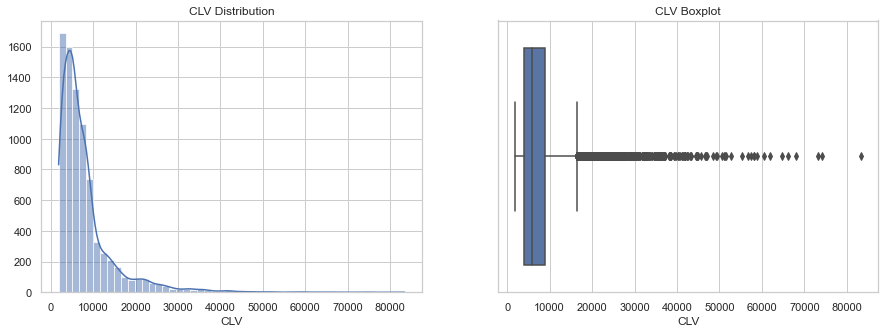

In [378]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.histplot(df['CLV'], bins=50, ax=axs[0], kde=True)
axs[0].set(xlabel='CLV', ylabel='', title='CLV Distribution')

sns.boxplot(df['CLV'], ax=axs[1])
axs[1].set(xlabel ='CLV', ylabel='', title='CLV Boxplot')

# Can we check for the count of customers in the top percentiles?
CLV_75 = df['CLV'].quantile(0.75)
CLV_85 = df['CLV'].quantile(0.85)
CLV_90 = df['CLV'].quantile(0.9)
CLV_95 = df['CLV'].quantile(0.95)
CLV_100 = df['CLV'].quantile(1)
print(CLV_75)
print(CLV_85)
print(CLV_90)
print(CLV_95)
print(CLV_100)

**Observations**

* CLV distribution is heavily right-skewed
* This indicates that there is a huge concentration of customers with lower CLVs and only a small proportion with higher CLVs (the long tail on the right after about 350000 - 40000 values)
* There are a lot of outliers! There is a big jump from the 95th percentile value to the 100th percentile (~21924 --> 83325)
* I should check for the count of customers who have CLVs at both ends of the spectrum. If I was in Marketing, this could help me narrow down my target customer base

In [379]:
# Checking for the count of high CLV customers who are above the 75th quartile value of a CLV of 8963
high_CLV = df[df['CLV'] > df['CLV'].quantile(0.75)]
print("The number of customers who have a CLV score of above 8000 is {}.".format(len(high_CLV)))

target_CLV = df[df['CLV'] > 30000]
perc = round((len(target_CLV) / len(df)) * 100)
print("The number of customers who have a CLV score of above 30,000 is {} and this is {}% of the overall customer set we are analyzing.".format(len(target_CLV), perc))

The number of customers who have a CLV score of above 8000 is 2025.
The number of customers who have a CLV score of above 30,000 is 156 and this is 2% of the overall customer set we are analyzing.


The Percentage of customers who have a CLV > 30,000 (the long tail) is around 2% of the customer set being analyzed. Are they also the same set that is producing the maximum revenue? This is yet to be analyzed. So, while there are many outliers, we will continue the analysis...

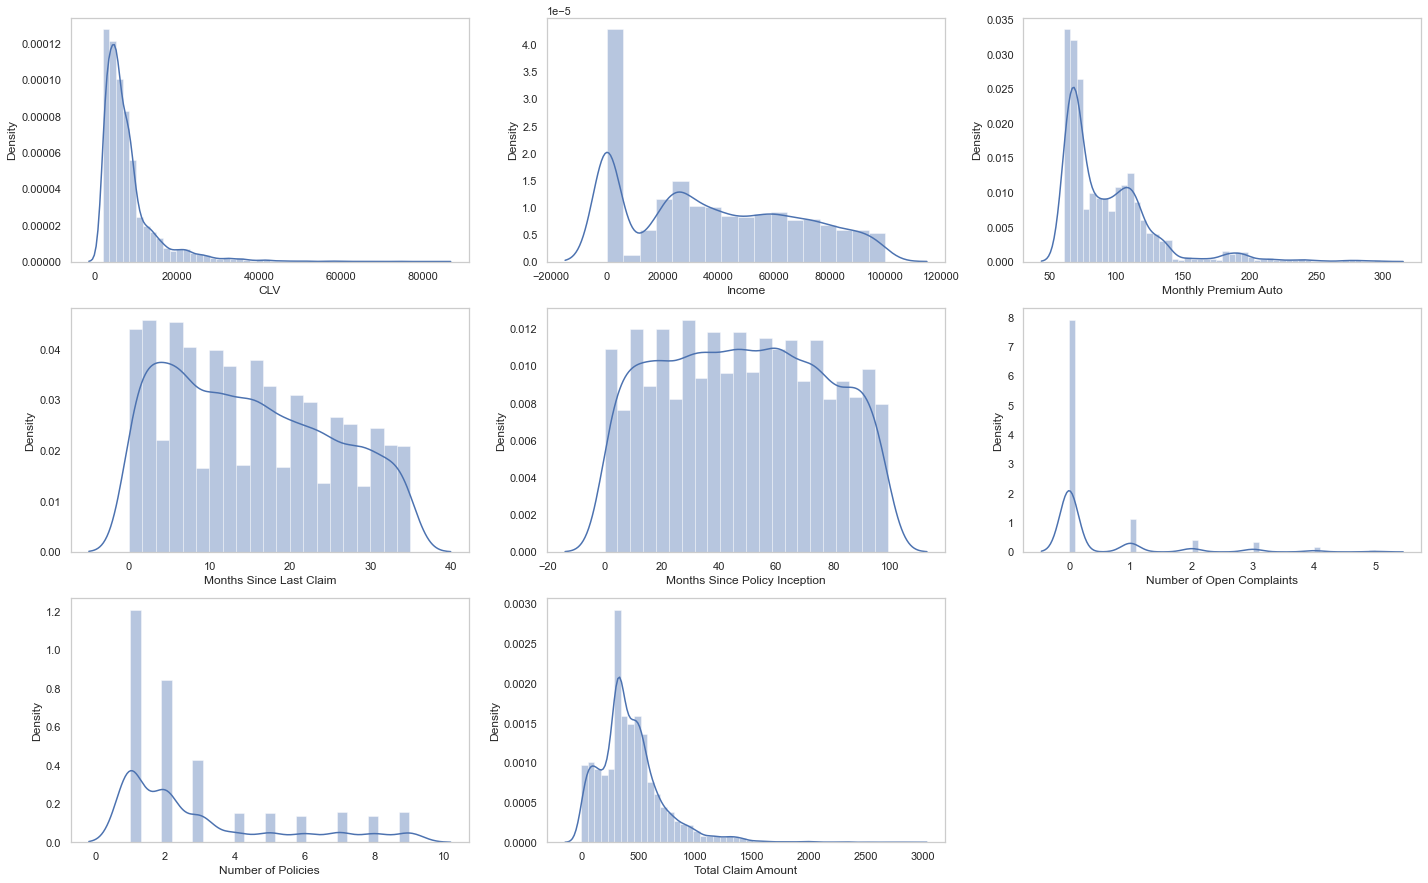

In [380]:
plt.figure(figsize=(20,16))

for i, col in enumerate(list(df_numerical)):
    plt.subplot(4,3,i+1)
    sns.distplot(df_numerical[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()


**Numerical Feature Analysis of the independent variables**

* Monthly Premium Auto, Total Claim Amount is also heavily right-skewed. 
* There are a lot of outliers in the above features.
* "Income", "Months Since Last Claim" and "Months Since Policy Inception" do not seem skewed and from the Heatmap above do not seem to heavily affect the CLV.

We will now plot a scatter plot with the histograms as well for each of these numerical features for ease of analysis and inference.

In [381]:
import plotly.express as px
corr_value = df["CLV"].corr(df["Monthly Premium Auto"])

fig = px.scatter(
    data_frame=df,
    x="CLV",
    y="Monthly Premium Auto",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Customer Lifetime Value and Monthly Premium Auto is: {corr_value:.2f}",
)

fig.show()

In [382]:
corr_value = df["CLV"].corr(df["Total Claim Amount"])

fig = px.scatter(
    data_frame=df,
    x="CLV",
    y="Total Claim Amount",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Customer Lifetime Value and Total Claim Amount is: {corr_value:.2f}",
)

fig.show()

In [383]:
corr_value = df["CLV"].corr(df["Number of Open Complaints"])

fig = px.scatter(
    data_frame=df,
    x="CLV",
    y="Number of Open Complaints",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Customer Lifetime Value and Number of Open Complaints is: {corr_value:.2f}",
)

fig.show()

**Question 1. WHAT ARE THE NUMERICAL FEATURES THAT IMPACT CLV (POSITIVE / NEGATIVE)**

From the above plots, it is quite clear that these are the top 3 numerical features that impact the Customer Lifetime Value the most. The above plots and visualizations suggest that **Monthly Premium Auto** and **Total Claim Amount** have the strongest influence on Customer Lifetime Value.

We can also infer that **Number of Open Complaints** is also a strong influencer for CLV, although negatively (correlation value = -0.04). This suggests that if the company can focus on keeping the open complaints down, the CLV can increase.

* *Monthly Premium Auto*: Correlation value = 0.4. There is a strong linear relationship with CLV, where we can see there is a high concentration of customers whose CLV is low, but are paying high monthly premiums. These are probably the set of customers who should be targeted for retention as they are the profitable ones.

* *Total Claim Amount*: Correlation value = 0.22. Similar trend is noticed for this feature as well. There is a big cluster of customers whose CLV is low, but are active in claiming; and hence, can be potential customers for cross-sell opportunities.

* *Number of Open Complaints*: Correlation value = - 0.4.This is a negatively impacting relationship with CLV, but equally effective. We can infer from this that the CLV of those customers is high who have the least number of complaints. They need to be in the target base as well, as we can infer that they are happy with the current plans that they have.

We will plot scatter plots to observe the correlation of other numerical features with CLV just so we do not miss out on anything and to confirm what we observed from the heatmap above.

[Text(0.5, 0, 'Income'),
 Text(0, 0.5, 'CLV'),
 Text(0.5, 1.0, 'CLV vs Income & Correlation Value is: 0.03')]

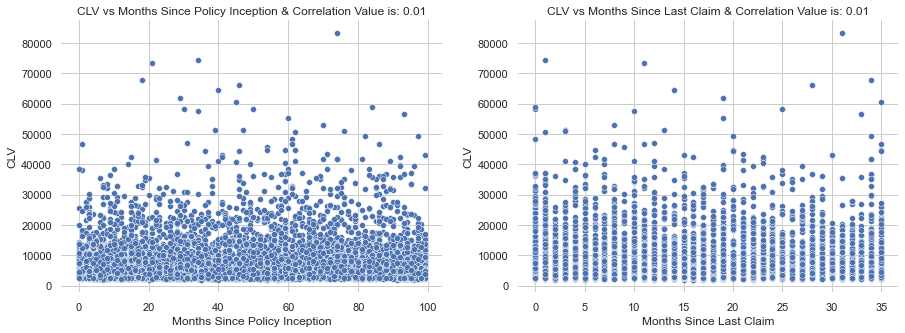

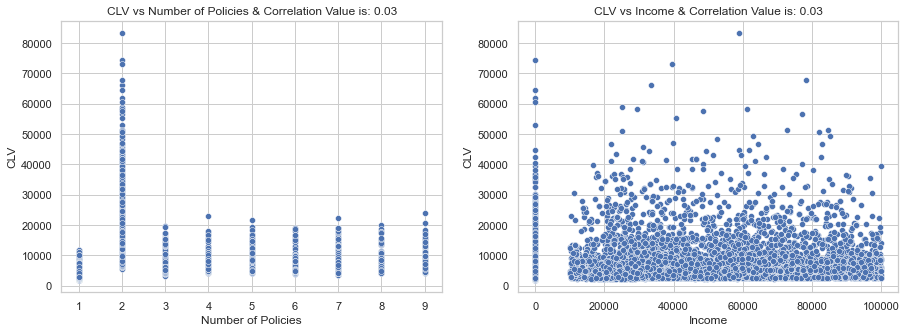

In [384]:
# Creating a grid figure
fig, axes = plt.subplots(1,2,figsize=(15,5))

corr_value = df["CLV"].corr(df["Months Since Policy Inception"])
#title=f"Correlation between Customer Lifetime Value and Number of Policies is: {corr_value:.2f}",
sns.scatterplot(x='Months Since Policy Inception', y='CLV', data=df_numerical, ax=axes[0])
axes[0].set(xlabel='Months Since Policy Inception', ylabel='CLV', title=f'CLV vs Months Since Policy Inception & Correlation Value is: {corr_value:.2f}')

corr_value = df["CLV"].corr(df["Months Since Last Claim"])
sns.scatterplot(x='Months Since Last Claim', y='CLV', data=df_numerical, ax=axes[1])
axes[1].set(xlabel='Months Since Last Claim', ylabel='CLV', title=f'CLV vs Months Since Last Claim & Correlation Value is: {corr_value:.2f}')
sns.despine(bottom=True, left=True)

fig, axes = plt.subplots(1,2,figsize=(15,5))
corr_value = df["CLV"].corr(df["Number of Policies"])
sns.scatterplot(x='Number of Policies', y='CLV', data=df_numerical, ax=axes[0])
axes[0].set(xlabel='Number of Policies', ylabel='CLV', title=f'CLV vs Number of Policies & Correlation Value is: {corr_value:.2f}')
corr_value = df["CLV"].corr(df["Income"])
sns.scatterplot(x='Income', y='CLV', data=df_numerical, ax=axes[1])
axes[1].set(xlabel='Income', ylabel='CLV', title=f'CLV vs Income & Correlation Value is: {corr_value:.2f}')


**Exploratory Data Analysis: Visualize & Analyze - Categorical Features**

We will now explore the Categorical Variables in the dataset and understand what contributes to making a High Value customer (Descriptive Analysis); and maybe later, we will predict on WHO can be a High Value customer (Predictive Analysis).

**Countplot of the various Categorical Features**

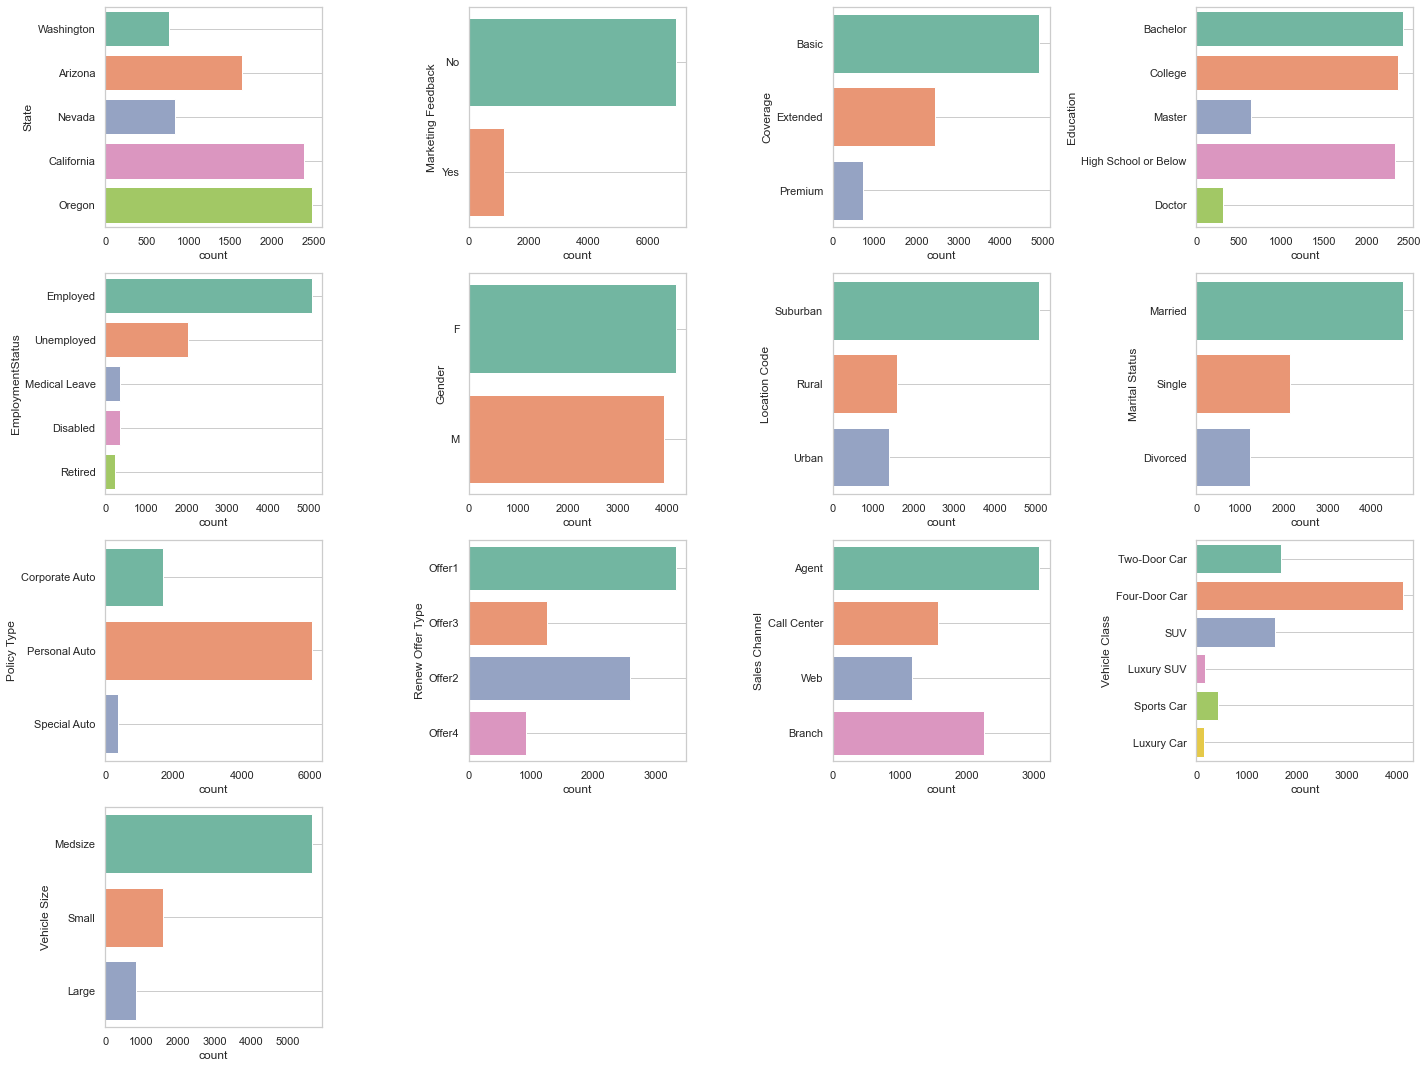

In [385]:
plt.figure(figsize=(20,15))

for i, col in enumerate(list(df_categorical)):
    plt.subplot(4,4,i+1)
    sns.countplot(y=df_categorical[col], label='data', palette='Set2')
    plt.grid()
    plt.tight_layout()

In [386]:
df_categorical.columns

Index(['State', 'Marketing Feedback', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size'],
      dtype='object')

**Pie Chart of the Categorical Features with %age breakup**

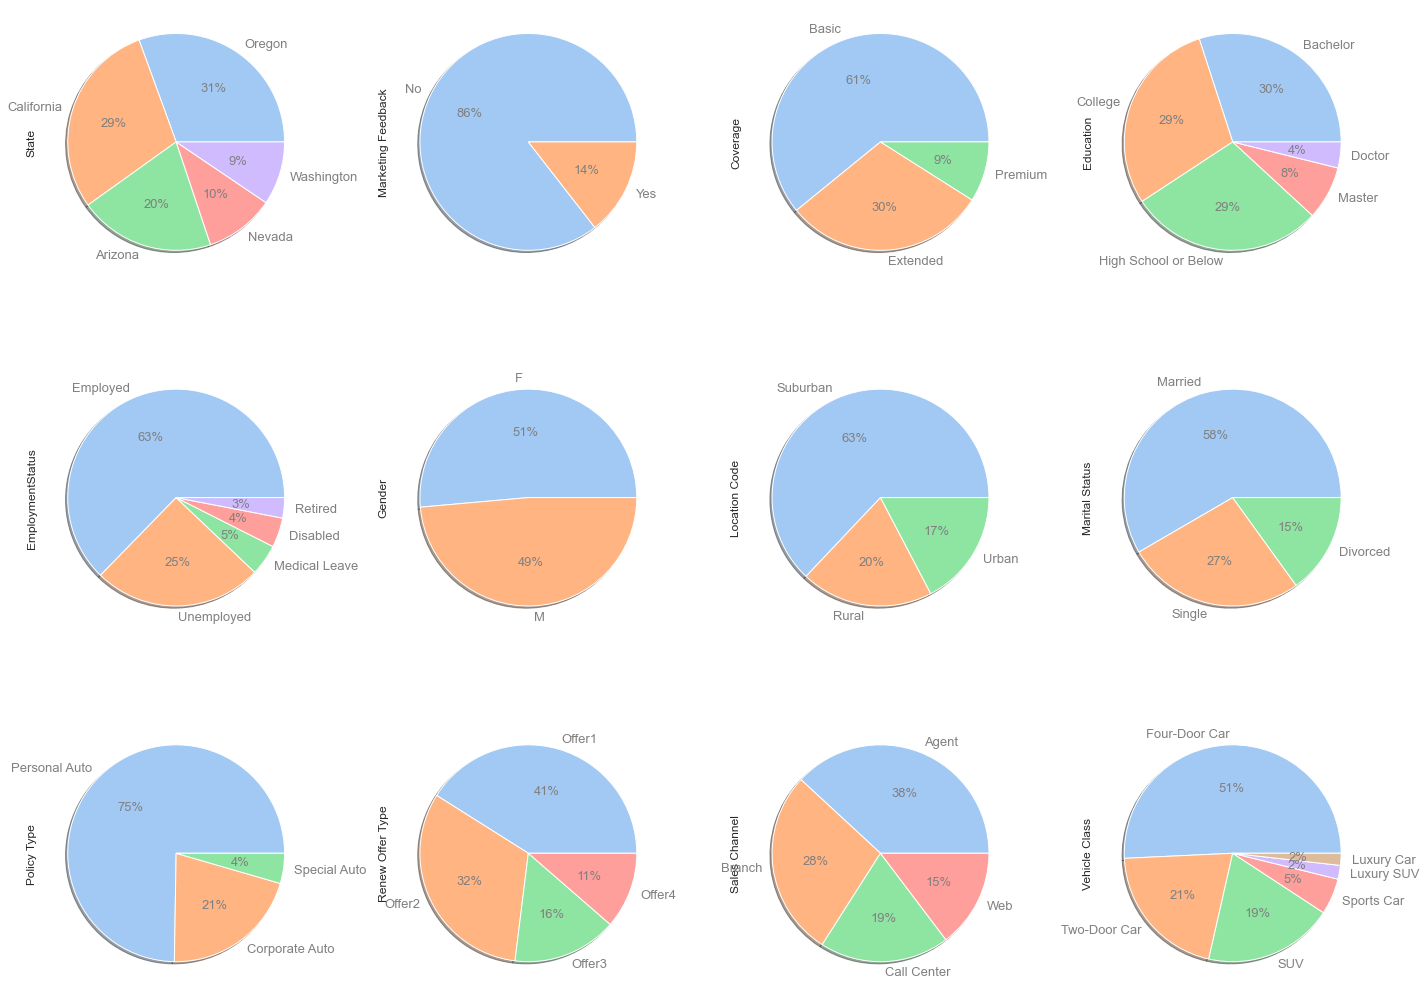

In [387]:
fig, axes = plt.subplots(round(len(df_categorical.columns) / 4), 4, figsize=(20,15))
colors = sns.color_palette('pastel')

for i, ax in enumerate(fig.axes):
    if i < len(df_categorical.columns):
        df[df_categorical.columns[i]].value_counts().plot.pie(autopct='%.0f%%', ax=ax, shadow=True, startangle=0, colors=colors, textprops = {'color' : 'grey', "fontsize" : 13})
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotate = 45)
        #ax.set_title(df_categorical.columns[i])
        

fig.tight_layout()

**Question 2. WHAT IS THE DEMOGRAPHIC PROFILE OF THE OBSERVED CUSTOMERS**

1. State: Customers predominantly from California & Oregon
2. Married, Suburban, Employed with a Bachelor's Degree / College Degree, owning a Medium Size 4-Door Car and covered by a Basic, Personal Auto policy are the features of the most observed customer profile.
    * High School or below is also an equivalent proportion; will need to check if that influences the CLV
3. Gender does not seem to matter much
4. Most active sales channel is either Branch-based or through an Agent. The Call Center and Online ways do not seem to be working for the company, indicating that Customers prefer the high-touch personalized mode - which seems fair, since this has to do with money and is quite personal in nature.
5. Most Renewal Offers are of the Offer 1, followed closely by Offer 2 - this might need a separate analysis of its' own, with more information on these renewal offer categories.
6. Marketing Feedback: 86% of the customers DID NOT respond to marketing feedback

**C) STATISTICAL SIGNIFICANCE TESTING**

**Test for normality of data for the CLV feature column**

* Null Hypothesis H0: Data is normally distributed
* Alternate Hypothesis HA: Data is not normally distributed

To check for this, we will do the Shapiro test. For a p-value < 0.05, we will reject the Null Hypothesis.

In [388]:
from scipy import stats

np.random.seed(1)
shapiro_test = stats.shapiro(df['CLV'])
shapiro_test


ShapiroResult(statistic=0.7024554014205933, pvalue=0.0)

We reject the null hypothesis; data is not normally distributed. And we will continue with the non-parametric tests to check for significance of the categorical variables on the target numeric variable.

For the Categorical columns, we will run 2 tests to test their significance, based on the p-values.

* Mannwhiteney Test on [Gender] and [Marketing Feedback] features - since they have only 2 populations (Male/Female, Yes/No respectively). We will like analyze their impact on CLV, by testing if the population means are "significantly different", thereby interpreting that there would be differences in the impact either feature would have on the CLV.

*Test for impact of Gender on CLV:*

H0: Males & Females are equally profitable 
HA: Females are more profitable

*Test for impact of Marketing Response on CLV:*

H0: Response to feedback has no impact on CLV
HA: Response has impact

* Annova test on the other features to test similar impact as above. We will infer from the p-values and accept or reject the null hypothesis for each feature.

After the above, we will be able to check on which are those categorical features that seem to have the most impact on CLV and will then proceed to further steps for predictive analysis.

In [389]:
df_categorical.columns

Index(['State', 'Marketing Feedback', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size'],
      dtype='object')

In [390]:
mannwhitney = []
anova = []

for i in df_categorical:
    if (df_categorical[i].nunique()>2):
        anova.append(i)
    else:
        mannwhitney.append(i)
print("Anova:", anova)
print("TTest:", mannwhitney)

Anova: ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
TTest: ['Marketing Feedback', 'Gender']


In [391]:
CLV = df['CLV']
df_cat = df_categorical.join(CLV)
df_cat

State Marketing Feedback  Coverage Education EmploymentStatus  \
0     Washington                 No     Basic  Bachelor         Employed   
1        Arizona                 No  Extended  Bachelor       Unemployed   
2         Nevada                 No   Premium  Bachelor         Employed   
3     California                 No     Basic  Bachelor       Unemployed   
4     Washington                 No     Basic  Bachelor         Employed   
...          ...                ...       ...       ...              ...   
8094      Oregon                 No  Extended    Master         Employed   
8095  California                 No     Basic  Bachelor       Unemployed   
8096      Oregon                 No     Basic   College         Employed   
8097     Arizona                Yes     Basic   College         Employed   
8098      Oregon                 No     Basic  Bachelor         Employed   

     Gender Location Code Marital Status     Policy Type Renew Offer Type  \
0         F      Suburban        Married  Corporate Auto           Offer1   
1         F      Suburban         Single   Personal Auto           Offer3   
2         F      Suburban        Married   Personal Auto           Offer1   
3         M      Suburban        Married  Corporate Auto           Offer1   
4         M         Rural         Single   Personal Auto           Offer1   
...     ...           ...            ...             ...              ...   
8094      F      Suburban        Married   Personal Auto           Offer2   
8095      F         Urban       Divorced   Personal Auto           Offer1   
8096      M         Urban        Married   Personal Auto           Offer1   
8097      F      Suburban       Divorced   Personal Auto           Offer2   
8098      F         Urban        Married   Personal Auto           Offer2   

     Sales Channel  Vehicle Class Vehicle Size           CLV  
0            Agent   Two-Door Car      Medsize   2763.519279  
1            Agent  Four-Door Car      Medsize   6979.535903  
2            Agent   Two-Door Car      Medsize  12887.431650  
3      Call Center            SUV      Medsize   7645.861827  
4            Agent  Four-Door Car      Medsize   2813.692575  
...            ...            ...          ...           ...  
8094   Call Center  Four-Door Car      Medsize   9726.551005  
8095        Branch            SUV      Medsize   8099.466122  
8096         Agent  Four-Door Car      Medsize   5020.473987  
8097   Call Center  Four-Door Car      Medsize   4834.710493  
8098         Agent  Four-Door Car      Medsize  17625.537630  

[8099 rows x 14 columns]

**a) Marketing Feedback**

In [392]:
#TTest for Marketing Feedback and impact on CLV
yes = df[df['Marketing Feedback'] == 'Yes']['CLV']
no = df[df['Marketing Feedback'] == 'No']['CLV']

a = stats.mannwhitneyu(yes, no)
print(a)

MannwhitneyuResult(statistic=3992547.0, pvalue=0.34762108087923294)


a) For the p-value (0.348) > 0.05, we will **fail to reject the Null Hypothesis**. We can infer that the distributions are similar for either responses with the mean falling in the same region (same rank). We can plot a Boxplot, a distribution plot and a frequency Table to visualize this better.

In other words, we can establish that Marketing Feedback does not impact CLV.

CLV
Marketing Feedback             
No                  8005.058310
Yes                 7840.821138

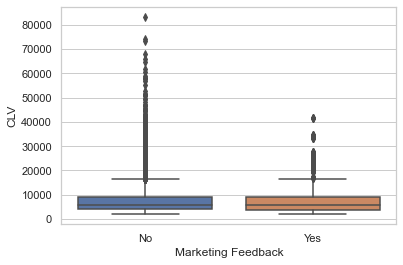

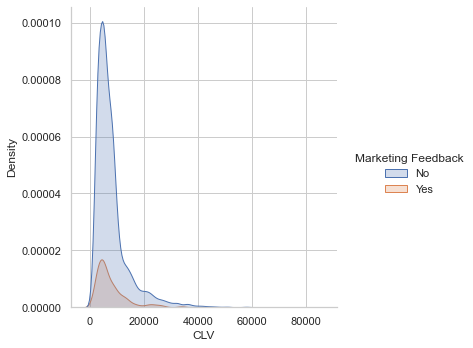

In [393]:
sns.boxplot(x=df['Marketing Feedback'], y=df['CLV'])
sns.displot(df_cat, x='CLV', hue='Marketing Feedback', kind='kde', fill=True)

df_cat.groupby(['Marketing Feedback']).mean().sort_values(by='CLV', ascending=False)

**b) Gender**

MannwhitneyuResult(statistic=8079425.0, pvalue=0.28156688795119056)


CLV
Gender             
F       8077.634205
M       7879.300692

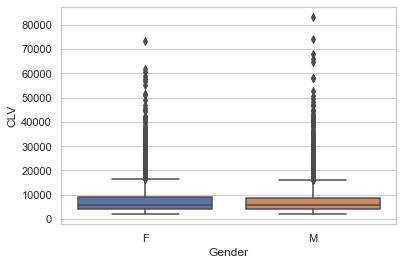

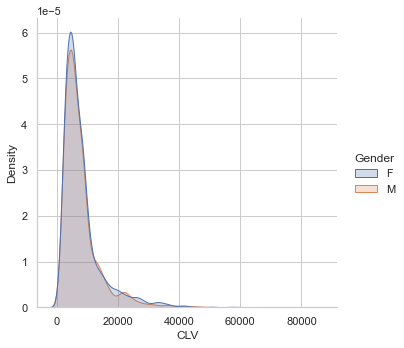

In [394]:
male = df[df['Gender'] == 'M']['CLV']
female = df[df['Gender'] == 'F']['CLV']

b = stats.mannwhitneyu(male, female)
print(b)

sns.boxplot(x=df['Gender'], y=df['CLV'])
sns.displot(df, x=df['CLV'], hue=df['Gender'], kind='kde', fill=True)

df_cat.groupby(['Gender']).mean().sort_values(by='CLV', ascending=False)

b) For the p-value (0.281) > 0.05, we **fail to reject the Null Hypothesis**. 
In other words, we can establish that Gender does not impact CLV. Mean for Females is slightly > Males, probably because the population of females for the dataset was more.

**Statistical significance tests for the other categorical variables**

* H0: Mean ranks of the State groups are the same
* HA: Mean ranks of the State groups are not the same

In layman terms, if we **fail to reject H0** for the feature being tested, the same can be inferred to have no impact on the target variable - CLV.

One-Way ANOVA and Kruskal-Wallis H methods are the approaches to reveal statistically significant differences between the distributions of > 2 groups. We will use the Kruskal Wallis test method, since it does not require the assumption of normality of distributions; which is the case we observed with the Shapiro test.

**c) State**

KruskalResult(statistic=7.000762654966366, pvalue=0.13584792806602403)
F_onewayResult(statistic=0.2844182481204999, pvalue=0.8882400716065941)


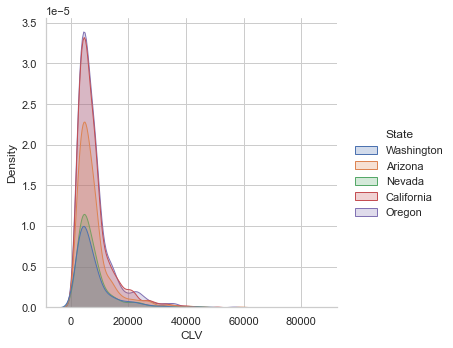

In [395]:
ca = df[df['State'] == 'California']['CLV']
Or = df[df['State'] == 'Oregon']['CLV']
wa = df[df['State'] == 'Washington']['CLV']
az = df[df['State'] == 'Arizona']['CLV']
ne = df[df['State'] == 'Nevada']['CLV']

c = stats.kruskal(ca, Or, wa, az, ne)
print(c)

c1 = stats.f_oneway(ca, Or, wa, az, ne)
print(c1)

sns.displot(df, x=df['CLV'], hue=df['State'], kind='kde', fill=True)

c) p-value > 0.05; **Failed to reject the Null Hypothesis**

**d) Coverage**

KruskalResult(statistic=440.92672263107187, pvalue=1.7946456839381562e-96)
F_onewayResult(statistic=114.33894668901861, pvalue=1.0754531606863518e-49)


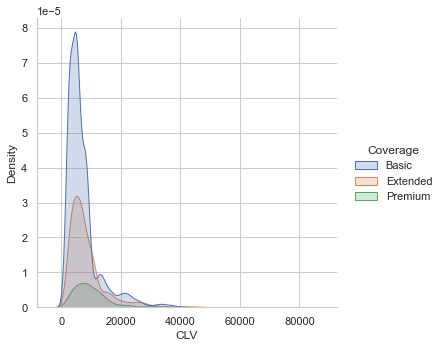

In [396]:
Ba = df[df['Coverage'] == 'Basic']['CLV']
Pr = df[df['Coverage'] == 'Premium']['CLV']
Ex = df[df['Coverage'] == 'Extended']['CLV']

d = stats.kruskal(Ba, Pr, Ex)
print(d)

d1 = stats.f_oneway(Ba, Pr, Ex)
print(d1)

sns.displot(df, x='CLV', hue=df['Coverage'], kind='kde', fill=True)

d) p-value > 0.05; **Failed to reject the Null Hypothesis**

**e) Education Status**

KruskalResult(statistic=11.16126879182479, pvalue=0.024810129975179118)


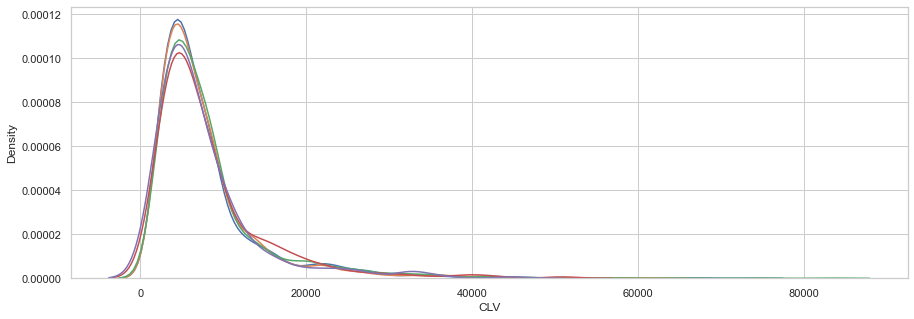

In [397]:
Ba = df[df['Education'] == 'Bachelor']['CLV']
Co = df[df['Education'] == 'College']['CLV']
Hi = df[df['Education'] == 'High School or Below']['CLV']
Ma = df[df['Education'] == 'Master']['CLV']
Dr = df[df['Education'] == 'Doctor']['CLV']

e = stats.kruskal(Ba, Co, Hi, Ma, Dr)
print(e)

plt.figure(figsize=(15,5))
sns.distplot(Ba, hist=False, label='Bachelor')
sns.distplot(Co, hist=False, label='College')
sns.distplot(Hi, hist=False, label='High School or Below')
sns.distplot(Ma, hist=False, label='Master')
sns.distplot(Dr, hist=False, label='Doctor')
plt.show()

e) p-value < 0.05: **Accept the Null Hypothesis**; Education is a significant factor for CLV

**f) Employment Status**

KruskalResult(statistic=45.331391371995174, pvalue=3.3926004140623953e-09)
F_onewayResult(statistic=4.249932289407595, pvalue=0.0019468346989820675)


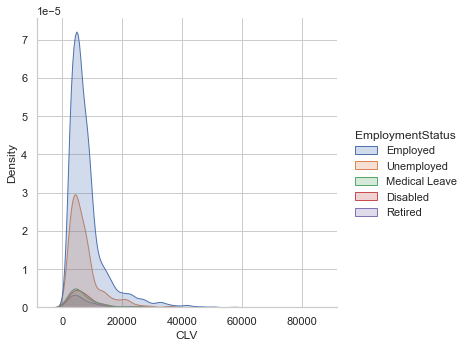

In [398]:
Em = df[df['EmploymentStatus'] == 'Employed']['CLV']
Ue = df[df['EmploymentStatus'] == 'Unemployed']['CLV']
Rt = df[df['EmploymentStatus'] == 'Retired']['CLV']
Di = df[df['EmploymentStatus'] == 'Disabled']['CLV']
Ml = df[df['EmploymentStatus'] == 'Medical Leave']['CLV']

f = stats.kruskal(Em,Ue,Rt,Di,Ml)
print(f)
f1 = stats.f_oneway(Em,Ue,Rt,Di,Ml)
print(f1)

sns.displot(df, x='CLV', hue=df['EmploymentStatus'], kind='kde', fill=True)

f) p-value in Kruskal test > 0.05, but in the f_one Way method is < 0.05. We will need to dig deeper into why this is so. However, from a domain perspective, it seems reasonable to expect that Employment Status will impact CLV. An employed customer is more likely to have a higher CLV than an unemployed one, for e.g. Hence, for now we will assume that this feature has an impact on CLV.

**g) Location Code**

In [399]:
Su = df[df['Location Code'] == 'Suburban']['CLV']
Ru = df[df['Location Code'] == 'Rural']['CLV']
Ur = df[df['Location Code'] == 'Urban']['CLV']

g = stats.kruskal(Su,Ru,Ur)
print(g)
g1= stats.f_oneway(Su,Ru,Ur)
print(g1)

KruskalResult(statistic=4.306063797042216, pvalue=0.1161315244721325)
F_onewayResult(statistic=0.06263623974114212, pvalue=0.9392855413094953)


g) Both p-values >0.05; **Fail to reject the null hypothesis**

**h) Marital Status**

KruskalResult(statistic=16.14935562546058, pvalue=0.00031132355627312756)
F_onewayResult(statistic=2.307085590159379, pvalue=0.09961640703857123)


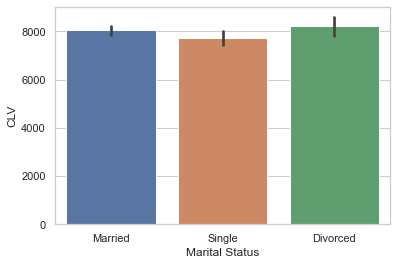

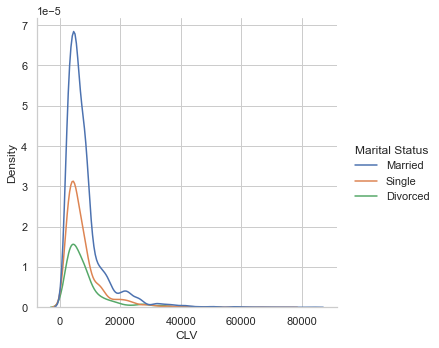

In [400]:
Ma = df[df['Marital Status'] == 'Married']['CLV']
Si = df[df['Marital Status'] == 'Single']['CLV']
Di = df[df['Marital Status'] == 'Divorced']['CLV']

h = stats.kruskal(Ma,Si,Di)
print(h)
h1 = stats.f_oneway(Ma,Si,Di)
print(h1)

sns.barplot(x='Marital Status', y='CLV', data=df)
sns.displot(df, x='CLV', hue='Marital Status', kind='kde')

h) Although the Kruskal and F_oneway test values are divergent again, the barplot seems to suggest that all 3 have similar distributions for CLV. Again, going by the domain understanding, we think that Marital Status can have a significant impact on the CLV.

**i) Policy Type**

In [401]:
Ca = df[df['Policy Type'] == 'Corporate Auto']['CLV']
Pa = df[df['Policy Type'] == 'Personal Auto']['CLV']
Sa = df[df['Policy Type'] == 'Special Auto']['CLV']

i = stats.kruskal(Ca,Pa,Sa)
print(i)
i1 = stats.f_oneway(Ca,Pa,Sa)
print(i1)


KruskalResult(statistic=5.900770523587682, pvalue=0.05231954534323441)
F_onewayResult(statistic=2.9023188146480394, pvalue=0.05495289774871119)


i) Just over the threshold of 0.05! We will consider these as not significant features.

**j) Sales Channel**

In [402]:
Ag = df[df['Sales Channel'] == 'Agent']['CLV']
Br = df[df['Sales Channel'] == 'Branch']['CLV']
We = df[df['Sales Channel'] == 'Web']['CLV']
Cc = df[df['Sales Channel'] == 'Call Center']['CLV']

j = stats.kruskal(Ag,Br,We,Cc)
print(j)
j=stats.f_oneway(Ag,Br,We,Cc)
j

KruskalResult(statistic=4.04483034719075, pvalue=0.2566637759241409)


F_onewayResult(statistic=0.6637404444834135, pvalue=0.5742561031363222)

j) p-value > 0.05 **Fail to reject the null hypothesis**. Not a significant feature.

**k) Renew Offer Type**

In [403]:
Of1 = df[df['Renew Offer Type'] == 'Offer1']['CLV']
Of2 = df[df['Renew Offer Type'] == 'Offer2']['CLV']
Of3 = df[df['Renew Offer Type'] == 'Offer3']['CLV']
Of4 = df[df['Renew Offer Type'] == 'Offer4']['CLV']

k = stats.kruskal(Of1,Of2,Of3,Of4)
print(k)
k1 = stats.f_oneway(Of1,Of2,Of3,Of4)
print(k1)

KruskalResult(statistic=161.5119729929216, pvalue=8.646244232912329e-35)
F_onewayResult(statistic=26.38795341516023, pvalue=5.595148783482246e-17)


k) p-value > 0.05; **Fail to reject the null hypothesis** Renew Offer type is not a significant feature for CLV prediction.

**l) Vehicle Class**

In [404]:
Dd = df[df['Vehicle Class'] == 'Four-Door Car']['CLV']
dd = df[df['Vehicle Class'] == 'Two-Door Car']['CLV']
Su = df[df['Vehicle Class'] == 'SUV']['CLV']
Sc = df[df['Vehicle Class'] == 'Sports Car']['CLV']
Ls = df[df['Vehicle Class'] == 'Luxury SUV']['CLV']
Lc = df[df['Vehicle Class'] == 'Luxury Car']['CLV']

l = stats.kruskal(Dd,dd,Su,Sc,Ls,Lc)
print(l)
l1 = stats.f_oneway(Dd,dd,Su,Sc,Ls,Lc)
print(l1)


KruskalResult(statistic=1166.4827053653314, pvalue=5.3425873187827994e-250)
F_onewayResult(statistic=237.8033246867069, pvalue=1.1223195666158463e-237)


l) p-value > 0.05. **Reject the Null Hypothesis** From a domain understanding, Vehicle Class should have an impact on CLV prediction.

**m) Vehicle Size**

In [405]:
Me = df[df['Vehicle Size'] == 'Medsize']['CLV']
Sm = df[df['Vehicle Size'] == 'Small']['CLV']
La = df[df['Vehicle Size'] == 'Large']['CLV']

m = stats.kruskal(Me,Sm,La)
print(m)
m1 = stats.f_oneway(Me,Sm,La)
print(m1)

KruskalResult(statistic=5.270064565445792, pvalue=0.07171665416234642)
F_onewayResult(statistic=1.1289439286016298, pvalue=0.3234254846558481)


m) The p-values > 0.05; Reject the null Hypothesis. However, from a domain understanding, Vehicle Size could have an impact on CLV prediction. So, we will treat this as such for now.

**D) FEATURE ENGINEERING & FEATURE SELECTION**

In [406]:
from sklearn.preprocessing import LabelEncoder
df_cat = df_cat.drop('CLV', axis=1)
df_cat

State Marketing Feedback  Coverage Education EmploymentStatus  \
0     Washington                 No     Basic  Bachelor         Employed   
1        Arizona                 No  Extended  Bachelor       Unemployed   
2         Nevada                 No   Premium  Bachelor         Employed   
3     California                 No     Basic  Bachelor       Unemployed   
4     Washington                 No     Basic  Bachelor         Employed   
...          ...                ...       ...       ...              ...   
8094      Oregon                 No  Extended    Master         Employed   
8095  California                 No     Basic  Bachelor       Unemployed   
8096      Oregon                 No     Basic   College         Employed   
8097     Arizona                Yes     Basic   College         Employed   
8098      Oregon                 No     Basic  Bachelor         Employed   

     Gender Location Code Marital Status     Policy Type Renew Offer Type  \
0         F      Suburban        Married  Corporate Auto           Offer1   
1         F      Suburban         Single   Personal Auto           Offer3   
2         F      Suburban        Married   Personal Auto           Offer1   
3         M      Suburban        Married  Corporate Auto           Offer1   
4         M         Rural         Single   Personal Auto           Offer1   
...     ...           ...            ...             ...              ...   
8094      F      Suburban        Married   Personal Auto           Offer2   
8095      F         Urban       Divorced   Personal Auto           Offer1   
8096      M         Urban        Married   Personal Auto           Offer1   
8097      F      Suburban       Divorced   Personal Auto           Offer2   
8098      F         Urban        Married   Personal Auto           Offer2   

     Sales Channel  Vehicle Class Vehicle Size  
0            Agent   Two-Door Car      Medsize  
1            Agent  Four-Door Car      Medsize  
2            Agent   Two-Door Car      Medsize  
3      Call Center            SUV      Medsize  
4            Agent  Four-Door Car      Medsize  
...            ...            ...          ...  
8094   Call Center  Four-Door Car      Medsize  
8095        Branch            SUV      Medsize  
8096         Agent  Four-Door Car      Medsize  
8097   Call Center  Four-Door Car      Medsize  
8098         Agent  Four-Door Car      Medsize  

[8099 rows x 13 columns]

In [407]:
# Use Label Encoder to encode categorical columns to enable them to run a Linear Regression analysis (to predict a continuous variable)

for col in df_cat:
    le = LabelEncoder()
    le.fit(df_cat[col])
    df_cat[col] = le.transform(df_cat[col])

df_cat.head()

State  Marketing Feedback  Coverage  Education  EmploymentStatus  Gender  \
0      4                   0         0          0                 1       0   
1      0                   0         1          0                 4       0   
2      2                   0         2          0                 1       0   
3      1                   0         0          0                 4       1   
4      4                   0         0          0                 1       1   

   Location Code  Marital Status  Policy Type  Renew Offer Type  \
0              1               1            0                 0   
1              1               2            1                 2   
2              1               1            1                 0   
3              1               1            0                 0   
4              0               2            1                 0   

   Sales Channel  Vehicle Class  Vehicle Size  
0              0              5             1  
1              0              0             1  
2              0              5             1  
3              2              3             1  
4              0              0             1

In [408]:
df_reg = pd.concat([df_numerical, df_cat], axis=1)
df_reg.head()

CLV   Income  Monthly Premium Auto  Months Since Last Claim  \
0   2763.519279  56274.0                  69.0                     32.0   
1   6979.535903      0.0                  94.0                     13.0   
2  12887.431650  48767.0                 108.0                     18.0   
3   7645.861827      0.0                 106.0                     18.0   
4   2813.692575  43836.0                  73.0                     12.0   

   Months Since Policy Inception  Number of Open Complaints  \
0                            5.0                        0.0   
1                           42.0                        0.0   
2                           38.0                        0.0   
3                           65.0                        0.0   
4                           44.0                        0.0   

   Number of Policies  Total Claim Amount  State  Marketing Feedback  ...  \
0                 1.0          384.811147      4                   0  ...   
1                 8.0         1131.464935      0                   0  ...   
2                 2.0          566.472247      2                   0  ...   
3                 7.0          529.881344      1                   0  ...   
4                 1.0          138.130879      4                   0  ...   

   Education  EmploymentStatus  Gender  Location Code  Marital Status  \
0          0                 1       0              1               1   
1          0                 4       0              1               2   
2          0                 1       0              1               1   
3          0                 4       1              1               1   
4          0                 1       1              0               2   

   Policy Type  Renew Offer Type  Sales Channel  Vehicle Class  Vehicle Size  
0            0                 0              0              5             1  
1            1                 2              0              0             1  
2            1                 0              0              5             1  
3            0                 0              2              3             1  
4            1                 0              0              0             1  

[5 rows x 21 columns]

In [409]:
# Create feature and target variable dataframes to run through SelectKbest library and select the top features

X_reg = df_reg.drop('CLV', axis=1)
y_reg = df_reg.iloc[:, 0] #CLV 

In [410]:
X_reg.head()

Income  Monthly Premium Auto  Months Since Last Claim  \
0  56274.0                  69.0                     32.0   
1      0.0                  94.0                     13.0   
2  48767.0                 108.0                     18.0   
3      0.0                 106.0                     18.0   
4  43836.0                  73.0                     12.0   

   Months Since Policy Inception  Number of Open Complaints  \
0                            5.0                        0.0   
1                           42.0                        0.0   
2                           38.0                        0.0   
3                           65.0                        0.0   
4                           44.0                        0.0   

   Number of Policies  Total Claim Amount  State  Marketing Feedback  \
0                 1.0          384.811147      4                   0   
1                 8.0         1131.464935      0                   0   
2                 2.0          566.472247      2                   0   
3                 7.0          529.881344      1                   0   
4                 1.0          138.130879      4                   0   

   Coverage  Education  EmploymentStatus  Gender  Location Code  \
0         0          0                 1       0              1   
1         1          0                 4       0              1   
2         2          0                 1       0              1   
3         0          0                 4       1              1   
4         0          0                 1       1              0   

   Marital Status  Policy Type  Renew Offer Type  Sales Channel  \
0               1            0                 0              0   
1               2            1                 2              0   
2               1            1                 0              0   
3               1            0                 0              2   
4               2            1                 0              0   

   Vehicle Class  Vehicle Size  
0              5             1  
1              0             1  
2              5             1  
3              3             1  
4              0             1

**Feature Selection using SelectKBest**

In [411]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

best_features = SelectKBest(score_func=mutual_info_regression, k='all')
fit = best_features.fit(X_reg,np.log(y_reg))

In [412]:
featcols = pd.DataFrame(X_reg.columns)

feat_scores = pd.DataFrame({'Feature' : X_reg.columns, 'Score' : fit.scores_})
print(feat_scores)

                          Feature     Score
0                          Income  0.913437
1            Monthly Premium Auto  1.670627
2         Months Since Last Claim  0.468395
3   Months Since Policy Inception  0.613218
4       Number of Open Complaints  0.096357
5              Number of Policies  0.788224
6              Total Claim Amount  1.096587
7                           State  0.000000
8              Marketing Feedback  0.322007
9                        Coverage  0.322376
10                      Education  0.176966
11               EmploymentStatus  0.219359
12                         Gender  0.075537
13                  Location Code  0.095460
14                 Marital Status  0.144066
15                    Policy Type  0.002674
16               Renew Offer Type  0.139731
17                  Sales Channel  0.137488
18                  Vehicle Class  0.315870
19                   Vehicle Size  0.094920


**Question 3. Which are the key features that will be most useful in predicting CLV?**


In [413]:
#Selecting the top 10 features with the highest scores
print(feat_scores.nlargest(10, 'Score'))

                          Feature     Score
1            Monthly Premium Auto  1.670627
6              Total Claim Amount  1.096587
0                          Income  0.913437
5              Number of Policies  0.788224
3   Months Since Policy Inception  0.613218
2         Months Since Last Claim  0.468395
9                        Coverage  0.322376
8              Marketing Feedback  0.322007
18                  Vehicle Class  0.315870
11               EmploymentStatus  0.219359


Interestingly, the list above shows Vehicle Class as one of the lowest scoring features. And Vehicle Size is not in the top 10. For an Automotive Insurance company, it is quite ironic that these variables do not seem to impact the CLV.

**E) MODEL BUILDING**

Since we need to predict CLV, a continuous variable, we will start with the simplest of solutions - The OLS; Ordinary Least Squares method for Regression Analysis. We will iterate further with other models for Linear Regression, if required at a later stage.

The 5 Assumptions to be checked for Linear Regression:

1. Linear Relationship - relationship between independent and dependent variables needs to be linear.
2. No Autocorrelation - little or no autocorrelation in the data; the residuals should be independent of each other. In other words, data within features should not be related to each other.
3. Multivariate Normality - data for all features should be uniformly distributed
4. Homoscedasticity - "noise" or randomness in the relationship between independent and dependent variables is uniformly distributed, across the residual line.
5. No or Low Multicollinearity - independent variables should not be correlated to each other. Leads to redundancy in information, skewing the results of the model.

We will use r2 score, Mean Square Error and Mean Absolute Error to assess the performance of our model, and later we will look at iterating further.

**OLS - Ordinary Least Squares**

In [414]:
import statsmodels.api as sm
X = df_reg.drop(['CLV'], axis=1)
y = df_reg['CLV']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     80.79
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.09e-300
Time:                        15:34:40   Log-Likelihood:                -82280.
No. Observations:                8099   AIC:                         1.646e+05
Df Residuals:                    8078   BIC:                         1.647e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           499.9588    485.872      1.029      0.304    -452.476    1452.393
Income                            0.0010      0.003      0.278      0.781      -0.006       0.008
Monthly Premium Auto             84.6913      3.071     27.578      0.000      78.671      90.711
Months Since Last Claim           7.7242      6.913      1.117      0.264      -5.828      21.276
Months Since Policy Inception    -0.7745      2.518     -0.308      0.758      -5.711       4.162
Number of Open Complaints      -244.4141     76.214     -3.207      0.001    -393.813     -95.016
Number of Policies               66.9967     29.259      2.290      0.022       9.641     124.352
Total Claim Amount               -0.9961      0.386     -2.582      0.010      -1.752      -0.240
State                            26.8627     52.688      0.510      0.610     -76.419     130.145
Marketing Feedback             -448.6690    202.600     -2.215      0.027    -845.816     -51.521
Coverage                       -214.9515    120.079     -1.790      0.073    -450.338      20.435
Education                       115.0416     50.607      2.273      0.023      15.838     214.245
EmploymentStatus               -129.8662     77.964     -1.666      0.096    -282.695      22.963
Gender                         -153.5685    140.170     -1.096      0.273    -428.338     121.201
Location Code                    98.2110    123.082      0.798      0.425    -143.061     339.483
Marital Status                 -155.7187    117.219     -1.328      0.184    -385.498      74.060
Policy Type                     376.6984    146.348      2.574      0.010      89.819     663.578
Renew Offer Type               -374.1408     72.180     -5.183      0.000    -515.632    -232.650
Sales Channel                    -5.3989     65.651     -0.082      0.934    -134.091     123.293
Vehicle Class                    44.5907     34.243      1.302      0.193     -22.535     111.717
Vehicle Size                     95.4862    129.911      0.735      0.462    -159.173     350.145
==============================================================================
Omnibus:                     5093.254   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60988.170
Skew:                           2.883   Prob(JB):                         0.00
Kurtosis:                      15.144   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**E1.Linearity Test**

In [415]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(lin_reg)
pval = lin_reg.resid.mean()
print(pval)
alpha = 0.05
if pval > alpha:
    print("{} is > 0.05; Failure to reject Null Hypothesis and Regression is Linear".format(pval))
else:
    print("Regression is not linear ")

1.5095105576811326e-09
Regression is not linear 


**E2.No Autocorrelation**

For a good model, there should be low or no autocorrelation. Durbin-Watson test to check for this; value ranges between 0-4.

0-2: Negative correlation
2: No correlation
2-4: Positive correlation

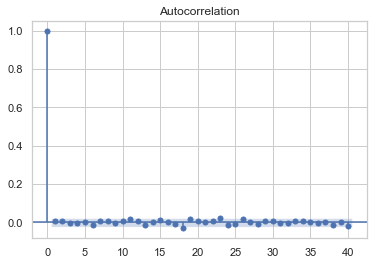

In [416]:
import statsmodels.tsa.api as smt 
acf = smt.graphics.plot_acf(lin_reg.resid, lags=40, alpha=0.05)
acf.show()

Since the graph above does not look cyclical on the horizontal line, it is inferred that there is No Autocorrelation.

**E3.Normality of Residuals**

For a good model, the residuals should be normally distributed; this is a goodness of fit test. 

Ho - Distribution is linear

Ha - Distribution is not linear

In [417]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=60988.17041634274, pvalue=0.0)


The JB Statistic is > significant value (5.99); hence, we reject the null hypothesis that error terms are normally distributed.

**E4. Homoscedasticity Test**

If the variance of the residuals are symmetrically distributed across the regression line, data is said to be Homescedastic. 

Ho - Variance is constant across the range of data

Ha - Variance is not constant across the range of data

In [418]:
import statsmodels.stats.api as sms

values = ['FStat', 'pval']
test = sms.het_goldfeldquandt(lin_reg.resid, lin_reg.model.exog)
print(test[1])
if test[1] < 0.05:
    print("pval is < 0.05; Reject the null hypothesis; data is Heteroskedastic")
else:
    print("Fail to Reject the null hypothesis")

3.9476026519795325e-10
pval is < 0.05; Reject the null hypothesis; data is Heteroskedastic


**E5. NO MULTICOLLINEARITY TEST**

In [419]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'VIF' : vif[1:]}, index=X.columns)

VIF
Income                         2.262179
Monthly Premium Auto           2.304949
Months Since Last Claim        1.005414
Months Since Policy Inception  1.014649
Number of Open Complaints      1.003611
Number of Policies             1.011376
Total Claim Amount             2.529438
State                          1.002146
Marketing Feedback             1.051259
Coverage                       1.280353
Education                      1.008652
EmploymentStatus               2.273877
Gender                         1.014887
Location Code                  1.158933
Marital Status                 1.144731
Policy Type                    1.001535
Renew Offer Type               1.099824
Sales Channel                  1.025897
Vehicle Class                  1.044504
Vehicle Size                   1.016928

If the VIF value is around 1, data is not correlated. The features shown above are not correlated. 

In [420]:
from sklearn.model_selection import train_test_split
X = df_reg.drop(['CLV'], axis=1)
y = df_reg['CLV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5669, 20)
(2430, 20)
(5669,)
(2430,)


**Linear Regression**

In [421]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
model = lr.fit(X_train, y_train)
lin_y_pred = model.predict(X_test)

print("Linear Regression MSE: ", mean_squared_error(y_test, lin_y_pred))
print("Linear Regression RMSE: ", np.sqrt(mean_squared_error(y_test, lin_y_pred)))
print("Linear Regression Mean Absolute Error: ", mean_absolute_error(y_test, lin_y_pred))
print("Linear Regression R2 Score: ",r2_score(y_test, lin_y_pred))
print("The model score is: ", model.score(X_test, y_test))

Linear Regression MSE:  39364150.117708065
Linear Regression RMSE:  6274.085600125971
Linear Regression Mean Absolute Error:  3895.391933652951
Linear Regression R2 Score:  0.16225275342746204
The model score is:  0.16225275342746204


Having built this base model, we can implement Recursive Backward Elimination to check which features could be most useful to predict CLV.

In [422]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
np.random.seed(123)
names = pd.DataFrame(X_train.columns)
#n_features_to_select = 10
rfe = RFECV(lr, step=1, cv=150)
my_values = rfe.fit(X_train, y_train)
my_values.support_
my_values.ranking_

rankings = pd.DataFrame(my_values.ranking_)
rankings

ranked = pd.concat([names, rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

most_important = ranked.loc[ranked["Rank"] == 1]
print(most_important)

most_important['Rank'].count()

                      Feature  Rank
1        Monthly Premium Auto     1
4   Number of Open Complaints     1
5          Number of Policies     1
7                       State     1
8          Marketing Feedback     1
9                    Coverage     1
10                  Education     1
11           EmploymentStatus     1
12                     Gender     1
13              Location Code     1
14             Marital Status     1
15                Policy Type     1
16           Renew Offer Type     1
18              Vehicle Class     1
19               Vehicle Size     1


15

In [423]:
X_new = X[['Monthly Premium Auto','Number of Open Complaints','Number of Policies','State','Marketing Feedback','Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size' ]]
X_new.head()

Monthly Premium Auto  Number of Open Complaints  Number of Policies  State  \
0                  69.0                        0.0                 1.0      4   
1                  94.0                        0.0                 8.0      0   
2                 108.0                        0.0                 2.0      2   
3                 106.0                        0.0                 7.0      1   
4                  73.0                        0.0                 1.0      4   

   Marketing Feedback  Coverage  Education  EmploymentStatus  Gender  \
0                   0         0          0                 1       0   
1                   0         1          0                 4       0   
2                   0         2          0                 1       0   
3                   0         0          0                 4       1   
4                   0         0          0                 1       1   

   Location Code  Marital Status  Policy Type  Renew Offer Type  \
0              1               1            0                 0   
1              1               2            1                 2   
2              1               1            1                 0   
3              1               1            0                 0   
4              0               2            1                 0   

   Vehicle Class  Vehicle Size  
0              5             1  
1              0             1  
2              5             1  
3              3             1  
4              0             1

In [424]:
X_constant_new = sm.add_constant(X_new)
lin_reg = sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          8.78e-304
Time:                        15:34:46   Log-Likelihood:                -82285.
No. Observations:                8099   AIC:                         1.646e+05
Df Residuals:                    8083   BIC:                         1.647e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1034.3284    378.090      2.736      0.006     293.174    1775.483
Monthly Premium Auto         79.4642      2.325     34.185      0.000      74.908      84.021
Number of Open Complaints  -239.9859     76.201     -3.149      0.002    -389.359     -90.612
Number of Policies           67.7876     29.245      2.318      0.020      10.459     125.116
State                        26.3171     52.692      0.499      0.617     -76.973     129.607
Marketing Feedback         -474.0310    201.766     -2.349      0.019    -869.544     -78.518
Coverage                   -210.9683    120.074     -1.757      0.079    -446.345      24.409
Education                   111.6812     50.592      2.207      0.027      12.508     210.854
EmploymentStatus           -207.0290     54.808     -3.777      0.000    -314.467     -99.591
Gender                     -180.7187    139.525     -1.295      0.195    -454.225      92.787
Location Code               -22.7924    114.519     -0.199      0.842    -247.279     201.694
Marital Status             -199.8431    115.856     -1.725      0.085    -426.950      27.264
Policy Type                 368.4650    146.338      2.518      0.012      81.606     655.324
Renew Offer Type           -372.7501     71.131     -5.240      0.000    -512.185    -233.315
Vehicle Class                45.7688     34.248      1.336      0.181     -21.366     112.904
Vehicle Size                 59.0420    129.167      0.457      0.648    -194.158     312.242
==============================================================================
Omnibus:                     5092.027   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60922.046
Skew:                           2.883   Prob(JB):                         0.00
Kurtosis:                      15.137   Cond. No.                         557.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value has not changed much irrespective of optimizing on features selection using Recursive Feature Elimination techniques as well. We will employ other Linear Regression models to check which model gives us the best result.

**Lasso & Ridge Regression**

In [425]:
from sklearn.linear_model import Ridge, Lasso

# Initiate a ridge object and fit to the training data
ridge = Ridge(alpha=0.1, fit_intercept=True, normalize=True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("Ridge Regression RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Ridge Regression Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Ridge Regression R2 Score: ",r2_score(y_test, y_pred))

Ridge Regression RMSE:  6283.700350756333
Ridge Regression Mean Absolute Error:  3895.0980433599434
Ridge Regression R2 Score:  0.15968316699366025


In [426]:
lasso = Lasso(random_state=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("Lasso Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Lasso Regression Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Lasso Regression R-squared: ", r2_score(y_test, y_pred))

Lasso Regression RMSE:  6273.98819034841
Lasso Regression Mean Absolute Error:  3895.14443104421
Lasso Regression R-squared:  0.16227876650559148


**Decision Tree**

In [427]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Decision Tree Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Decision Tree R-squared: ", r2_score(y_test, y_pred))


Decision Tree RMSE:  5263.382489875611
Decision Tree Mean Absolute Error:  1777.8915213403295
Decision Tree R-squared:  0.4104210186233507


The Decision Tree model shows a markedly improved R-Squared value

**Random Forest**

In [428]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest R-squared: ", r2_score(y_test, y_pred))

Random Forest RMSE:  3697.694559581726
Random Forest Mean Absolute Error:  1493.9708990195554
Random Forest R-squared:  0.709012590417505


The Random Forest regression model shows a big jump in the R-squared value. Let's try the hyperparameter tuning of the Random Forest regressor.

In [429]:
rf = RandomForestRegressor(random_state=1)

from pprint import pprint

#Look at parameters being currently used
print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


We are now fairly certain that the Random Forest regression model is so far better than the other models based on the R-squared model. We will tune the Random Forest regressor using Hyperparameter tuning - Randomized Search Training and then Grid Search Cross Validation; this is being done to narrow down the search for the best and optimized set of features that would ensure higher accuracy for our model. 

In [430]:
from sklearn.model_selection import RandomizedSearchCV

#Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] 
#Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
#Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#Minimum number of samples required to split at each node
min_samples_split = [2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
#Method of selecting samples for training at each node
bootstrap = [True, False]
#Create the Random Grid
random_grid = {'n_estimators' : n_estimators, 
                'max_features' : max_features, 
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'bootstrap' : bootstrap}

pprint(random_grid)

rf = RandomForestRegressor() #Create the base model
#Random search across all parameters, using a 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=1, n_jobs=-1)

#Fit the random search model
rf_random.fit(X_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.3s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   8.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [431]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

We can check for the performance of the Random Forest Regressor with the above best parameters obtained from the Random Search training method. The R-squared value in the base model (without Random Search) was 0.70. Let us see if this yields a better value.

In [432]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest R-squared: ", r2_score(y_test, y_pred))

Random Forest RMSE:  3690.5702566548166
Random Forest Mean Absolute Error:  1523.2875653094293
Random Forest R-squared:  0.7101327940087394


There is only a minor improvement in the model with Random Search training method. We will try with Grid Search and see if that helps with the optimized set of parameters that we obtained from the Random Search.

In [433]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of the Random Search
params = {'bootstrap': [True],
            'max_depth': [10,20,30],
            'max_features': ['auto', 'sqrt'],
            'n_estimators': [100,200,50],
            'min_samples_leaf': [3,4,5],
            'min_samples_split': [3,5,7]}

#Instantiate a Grid Search model
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total t

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 50]},
             verbose=2)

In [434]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [435]:
rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Grid Search RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest Grid Search Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest Grid Search R-squared: ", r2_score(y_test, y_pred))

Random Forest Grid Search RMSE:  3701.746429155053
Random Forest Grid Search Mean Absolute Error:  1516.7723966860658
Random Forest Grid Search R-squared:  0.7083745231030996


In [436]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(RandomForestRegressor(max_depth=5, criterion='mse'), n_estimators=50)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5))

In [437]:
y_pred = adaboost.predict(X_test)

print("Random Forest Adaboost RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest Adaboost Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest Adaboost R-squared: ", r2_score(y_test, y_pred))

Random Forest Adaboost RMSE:  4319.144890499958
Random Forest Adaboost Mean Absolute Error:  2284.3165542553656
Random Forest Adaboost R-squared:  0.6029843047229946


In [438]:
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False)[:10]

Score
Number of Policies             0.528132
Monthly Premium Auto           0.268966
Total Claim Amount             0.035762
Months Since Last Claim        0.035054
Months Since Policy Inception  0.031483
Income                         0.026438
Education                      0.010295
Renew Offer Type               0.009042
Sales Channel                  0.008244
State                          0.008017

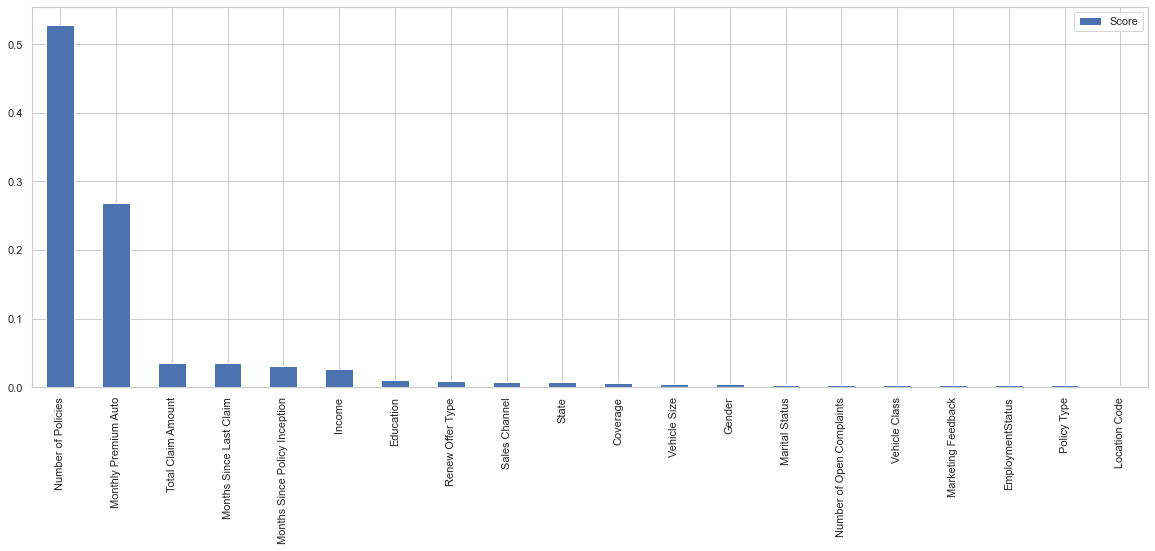

In [439]:
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False).plot(kind = 'bar', figsize=(20,7))
plt.show()

**Linear Regression Model**
* Linear Regression MSE:  39364150.117708065
* Linear Regression RMSE:  6274.085600125971
* Linear Regression Mean Absolute Error:  3895.391933652951
* Linear Regression R2 Score:  0.16225275342746204

**Lasso Regression Model**
* Lasso Regression RMSE:  6273.98819034841
* Lasso Regression Mean Absolute Error:  3895.14443104421
* Lasso Regression R-squared:  0.16227876650559148

**Ridge Regression Model**
* Ridge Regression RMSE:  6283.700350756333
* Ridge Regression Mean Absolute Error:  3895.0980433599434
* Ridge Regression R2 Score:  0.15968316699366025

**Decision Tree Model**
* Decision Tree RMSE:  5263.382489875611
* Decision Tree Mean Absolute Error:  1777.8915213403295
* Decision Tree R-squared:  0.4104210186233507

**Random Forest Base Model**
* Random Forest RMSE:  3697.694559581726
* Random Forest Mean Absolute Error:  1493.9708990195554
* Random Forest R-squared:  0.709012590417505

**Random Forest Base Model with Random Search**
* Random Forest RMSE:  3690.5702566548166
* Random Forest Mean Absolute Error:  1523.2875653094293
* Random Forest R-squared:  0.7101327940087394

**Random Forest Base Model with Grid Search**
* Random Forest Grid Search RMSE:  3701.746429155053
* Random Forest Grid Search Mean Absolute Error:  1516.7723966860658
* Random Forest Grid Search R-squared:  0.7083745231030996

**Random Forest Base Model Adaboost**
* Random Forest Adaboost RMSE:  4319.144890499958
* Random Forest Adaboost Mean Absolute Error:  2284.3165542553656
* Random Forest Adaboost R-squared:  0.6029843047229946

**F) FINAL MODEL & BEST FEATURES**
* By comparing the R^2 Scores, we see that the Random Forest with Random Search can be chosen as the best model, having better evaluation scores.
* "Number of Policies" and "Monthly Premium Auto" seem to be the most important features in predicting CLV

**G) SUMMARY OF INFERENCES**

* There are a lot of Customers with low CLV. Very few customers with high CLV.
* Married, Suburban, Employed with a Bachelor's Degree / College Degree, owning a Medium Size 4-Door Car and covered by a Basic, Personal Auto policy are the features of the most observed customer profile.
* There are more Customers who have taken Basic Insurance than the other policies.
* Gender has no role to play in determining the value of a customer. Both Male and Female looks valuable.
* Customers are predominantly from California & Oregon; these states can be focused on.
* Rural customers are LESS valuable than Urban customers.
* Customers having their own Personal Policy are more valuable to company then Corporate and Special Insurance policy holder.
* Offers 1 and Offer 2 attracts more customers.
* Call Center is not performing well compared to other channels throughout the country (in terms of high value customers). Most active sales channel is either Branch-based or through an Agent. The Call Center and Online ways do not seem to be working for the company, indicating that Customers prefer the high-touch personalized mode - which seems fair, since this has to do with money and is quite personal in nature.
* Customers having Mid Size vehicles, Four-Door car or SUV are more valuable.
* The customers having more number of policies with high monthly premium will add more value to company. 
* On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.

**Question4. What are the key business recommendations we can make by observing and analyzing this dataset?**

**H) RECOMMENDATIONS FROM THIS ANALYSIS**
Following can be some of the key points that the Marketing department of the Automobile Insurance company can look at as next steps to increase CLV.

* TARGET CUSTOMER BASE FOR CROSS-SELL/UP-SELL
    * Married, Suburban, Employed with a Bachelor's Degree / College Degree from California/Oregon, owning a Medium Size 4-Door car
    * Paying High Monthly Premium Auto
    * Currently owning > 1 number of policies
* TARGET ACTIONS FOR CUSTOMER RETENTION & SATISFACTION
    * Resolve high number of open complaints
    * Improve Call Center and Online mode of customer interactions